### Data Description

From your conversation with Lucy, you know that she is interested in looking into the yearly sales data broken down by countries, product categories, and age groups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("Lab3.csv",parse_dates=['Date'],infer_datetime_format=True,dayfirst=True)

In [3]:
df

,Date,Month,Year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,2011-01-01,January,2011,11455,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",46.0,1,1252,2295,1252,NaN,-1252
1,2011-01-01,January,2011,12494,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",48.0,2,2171,3578,4342,5439.0,1097
2,2011-01-01,January,2011,13148,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",44.0,1,1519,2443,1519,2419.0,900
3,2011-01-01,January,2011,16361,42,Adults (35-64),M,United_States,California,Bikes,Road Bikes,"Road-750 Black, 44",44.0,1,344,540,344,529.0,185
4,2011-01-01,January,2011,19413,39,Adults (35-64),M,United_States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",38.0,3,713,1120,2139,2621.0,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-07-31,July,2016,27496,43,Adults (35-64),M,Australia,Victoria,Accessories,Tires and Tubes,HL Mountain Tire,NaN,13,13,35,169,359.0,190
113032,2016-07-31,July,2016,27686,34,Young Adults (25-34),M,Australia,New South Wales,Accessories,Tires and Tubes,Mountain Tire Tube,NaN,16,2,5,32,70.0,38
113033,2016-07-31,July,2016,27686,34,Young Adults (25-34),M,Australia,New South Wales,Accessories,Tires and Tubes,Mountain Tire Tube,NaN,8,2,5,16,35.0,19
113034,2016-07-31,July,2016,13350,54,Adults (35-64),M,Canada,British Columbia,Clothing,Vests,"Classic Vest, S",NaN,11,24,64,264,697.0,433


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Month             113036 non-null  object        
 2   Year              113036 non-null  int64         
 3   Customer ID       113036 non-null  int64         
 4   Customer Age      113036 non-null  int64         
 5   Age Group         113036 non-null  object        
 6   Customer Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product Category  113036 non-null  object        
 10  Sub Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Frame Size        25982 non-null   float64       
 13  Order Quantity    113036 non-null  int64         
 14  Unit

In [5]:
df.columns

Index(['Date', 'Month', 'Year', 'Customer ID', 'Customer Age', 'Age Group',
       'Customer Gender', 'Country', 'State', 'Product Category',
       'Sub Category', 'Product', 'Frame Size', 'Order Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue', 'Profit'],
      dtype='object')

Arrange the layout so that the pivot table displays the Product Category and Sub Category in the Rows, Year in the Columns, and Revenue (Sum of) as the Values.

In [6]:
df1 = df[['Product Category','Sub Category','Year','Revenue']]
df1

,Product Category,Sub Category,Year,Revenue
0,Bikes,Mountain Bikes,2011,NaN
1,Bikes,Road Bikes,2011,5439.0
2,Bikes,Road Bikes,2011,2419.0
3,Bikes,Road Bikes,2011,529.0
4,Bikes,Road Bikes,2011,2621.0
...,...,...,...,...
113031,Accessories,Tires and Tubes,2016,359.0
113032,Accessories,Tires and Tubes,2016,70.0
113033,Accessories,Tires and Tubes,2016,35.0
113034,Clothing,Vests,2016,697.0


In [7]:
pd.pivot_table(df1, values='Revenue', index=['Product Category','Sub Category'],columns='Year',dropna=False)

Year                                       2011         2012         2013  \
Product Category Sub Category                                               
Accessories      Bike Racks                 NaN          NaN   821.934307   
                 Bike Stands                NaN          NaN   801.647059   
                 Bottles and Cages          NaN          NaN    89.378246   
                 Caps                       NaN          NaN          NaN   
                 Cleaners                   NaN          NaN   111.853786   
                 Fenders                    NaN          NaN   322.284258   
                 Gloves                     NaN          NaN          NaN   
                 Helmets                    NaN          NaN   485.650416   
                 Hydration Packs            NaN          NaN   778.659016   
                 Jerseys                    NaN          NaN          NaN   
                 Mountain Bikes             NaN          NaN          NaN   
                 Road Bikes                 NaN          NaN          NaN   
                 Shorts                     NaN          NaN          NaN   
                 Socks                      NaN          NaN          NaN   
                 Tires and Tubes            NaN          NaN   142.016761   
                 Touring Bikes              NaN          NaN          NaN   
                 Vests                      NaN          NaN          NaN   
Bikes            Bike Racks                 NaN          NaN          NaN   
                 Bike Stands                NaN          NaN          NaN   
                 Bottles and Cages          NaN          NaN          NaN   
                 Caps                       NaN          NaN          NaN   
                 Cleaners                   NaN          NaN          NaN   
                 Fenders                    NaN          NaN          NaN   
                 Gloves                     NaN          NaN          NaN   
                 Helmets                    NaN          NaN          NaN   
                 Hydration Packs            NaN          NaN          NaN   
                 Jerseys                    NaN          NaN          NaN   
                 Mountain Bikes     3577.291531  3549.354472  1787.759100   
                 Road Bikes         3281.580019  3391.430650  1729.121201   
                 Shorts                     NaN          NaN          NaN   
                 Socks                      NaN          NaN          NaN   
                 Tires and Tubes            NaN          NaN          NaN   
                 Touring Bikes              NaN          NaN  1563.144242   
                 Vests                      NaN          NaN          NaN   
Clothing         Bike Racks                 NaN          NaN          NaN   
                 Bike Stands                NaN          NaN          NaN   
                 Bottles and Cages          NaN          NaN          NaN   
                 Caps                       NaN          NaN   132.280226   
                 Cleaners                   NaN          NaN          NaN   
                 Fenders                    NaN          NaN          NaN   
                 Gloves                     NaN          NaN   330.151463   
                 Helmets                    NaN          NaN          NaN   
                 Hydration Packs            NaN          NaN          NaN   
                 Jerseys                    NaN          NaN   706.124815   
                 Mountain Bikes             NaN          NaN          NaN   
                 Road Bikes                 NaN          NaN          NaN   
                 Shorts                     NaN          NaN  1028.652874   
                 Socks                      NaN          NaN   132.612903   
                 Tires and Tubes            NaN          NaN          NaN   
                 Touring Bikes              NaN          NaN          NaN

This time arrange the layout so that the pivot table displays the Frame Size in the Rows and Revenue (Sum of) as the Values. Hide the rows that do not have a Frame size (blank Frame size), then sort the pivot table by Sum of Revenue so that the Frame size with the highest revenue is displayed first.

In [8]:
df2 = df[['Frame Size', 'Revenue']]

In [9]:
df2

,Frame Size,Revenue
0,46.0,NaN
1,48.0,5439.0
2,44.0,2419.0
3,44.0,529.0
4,38.0,2621.0
...,...,...
113031,NaN,359.0
113032,NaN,70.0
113033,NaN,35.0
113034,NaN,697.0


In [10]:
df2 = pd.pivot_table(df2, values='Revenue', index=['Frame Size'],dropna=False,aggfunc='sum')
df2

,Revenue
Frame Size,
38.0,7934102.0
40.0,1810719.0
42.0,8385348.0
44.0,6487682.0
46.0,7230025.0
48.0,8197548.0
50.0,1875166.0
52.0,5957787.0
54.0,1600407.0


In [11]:
df2['Revenue'].sort_values(ascending=False)

Frame Size
42.0    8385348.0
48.0    8197548.0
38.0    7934102.0
46.0    7230025.0
44.0    6487682.0
52.0    5957787.0
62.0    4287129.0
56.0    3158805.0
58.0    3111467.0
50.0    1875166.0
40.0    1810719.0
60.0    1744136.0
54.0    1600407.0
Name: Revenue, dtype: float64

Last but not least, add another pivot table with Age Group as the Rows and Revenue (Sum of) as the Values. You will learn how to custom sort the Age Group in the next module. But for now, sort the pivot table by Sum of Revenue so that the Age Group with the highest revenue is displayed first.

In [12]:
df3 = df[['Age Group', 'Revenue']]

In [13]:
df3

,Age Group,Revenue
0,Youth (<25),NaN
1,Young Adults (25-34),5439.0
2,Youth (<25),2419.0
3,Adults (35-64),529.0
4,Adults (35-64),2621.0
...,...,...
113031,Adults (35-64),359.0
113032,Young Adults (25-34),70.0
113033,Young Adults (25-34),35.0
113034,Adults (35-64),697.0


In [14]:
df3 = pd.pivot_table(df3, values='Revenue', index=['Age Group'],dropna=True, aggfunc='sum')
df3

,Revenue
Age Group,
Adults (35-64),42584153.0
Seniors (64+),308042.0
Young Adults (25-34),30655614.0
Youth (<25),11721386.0


First, add a pivot chart for the pivot table that shows yearly sales (revenue) by Country (the pivot table you created for question 2 in Lab 3A). Select a Line chart to display the yearly trend. Make sure that the Years are located in the X axis, the Revenue in the Y axis, and the Countries as categories. 

In [15]:
df4 = pd.pivot_table(df, values='Revenue', index=['Year'],columns=['Country'],dropna=True, aggfunc='sum')
df4

Country,Australia,Canada,France,Germany,United_Kingdom,United_States
Year,,,,,,
2011,2528101.0,789798.0,946624.0,833603.0,823481.0,3041468.0
2012,2557511.0,835527.0,962153.0,835188.0,834885.0,3150719.0
2013,4107470.0,1443537.0,1431870.0,1452704.0,1868796.0,4935660.0
2014,2802842.0,1471522.0,1411100.0,1702508.0,2014044.0,4750708.0
2015,5712339.0,1731954.0,1877928.0,1931091.0,2484181.0,6286498.0
2016,3591983.0,1663400.0,1803197.0,2223502.0,2620809.0,5810494.0


In [16]:
df4.reset_index(inplace=True)

In [17]:
df4

Country,Year,Australia,Canada,France,Germany,United_Kingdom,United_States
0,2011,2528101.0,789798.0,946624.0,833603.0,823481.0,3041468.0
1,2012,2557511.0,835527.0,962153.0,835188.0,834885.0,3150719.0
2,2013,4107470.0,1443537.0,1431870.0,1452704.0,1868796.0,4935660.0
3,2014,2802842.0,1471522.0,1411100.0,1702508.0,2014044.0,4750708.0
4,2015,5712339.0,1731954.0,1877928.0,1931091.0,2484181.0,6286498.0
5,2016,3591983.0,1663400.0,1803197.0,2223502.0,2620809.0,5810494.0


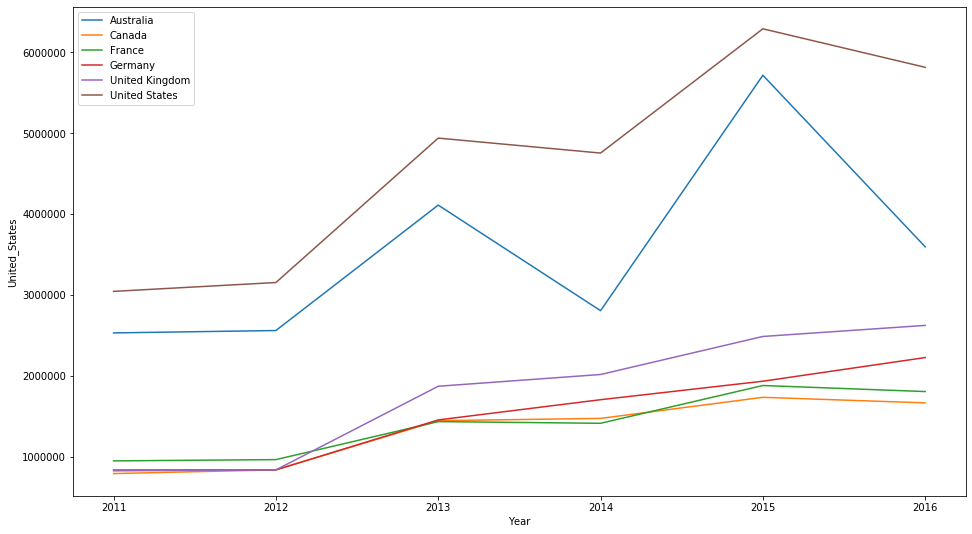

In [18]:
plt.figure(figsize=(16,9))
sns.lineplot(x=df4.Year,y=df4.Australia, data=df4);
sns.lineplot(x=df4.Year,y=df4.Canada, data=df4);
sns.lineplot(x=df4.Year,y=df4.France, data=df4);
sns.lineplot(x=df4.Year,y=df4.Germany, data=df4);
sns.lineplot(x=df4.Year,y=df4.United_Kingdom, data=df4);
sns.lineplot(x=df4.Year,y=df4.United_States, data=df4);
plt.legend(labels=['Australia','Canada', 'France', 'Germany', 'United Kingdom', 'United States']);

Add another pivot chart for the pivot table that shows yearly sales (revenue) by Product Category (the pivot table you created for question 1 in Lab 3A). Select a Column chart to display the yearly sales by category so that the years are together.

In [19]:
df5 = pd.pivot_table(df, values='Revenue', index=['Year'],columns=['Product Category'],dropna=True, aggfunc='sum')
df5

Product Category,Accessories,Bikes,Clothing
Year,,,
2011,NaN,8963075.0,NaN
2012,NaN,9175983.0,NaN
2013,3384215.0,9858787.0,1997035.0
2014,4293592.0,7611243.0,2247889.0
2015,3285954.0,14799083.0,1938954.0
2016,4154231.0,11372150.0,2187004.0


In [20]:
df5.reset_index(inplace=True)

In [21]:
df5

Product Category,Year,Accessories,Bikes,Clothing
0,2011,NaN,8963075.0,NaN
1,2012,NaN,9175983.0,NaN
2,2013,3384215.0,9858787.0,1997035.0
3,2014,4293592.0,7611243.0,2247889.0
4,2015,3285954.0,14799083.0,1938954.0
5,2016,4154231.0,11372150.0,2187004.0


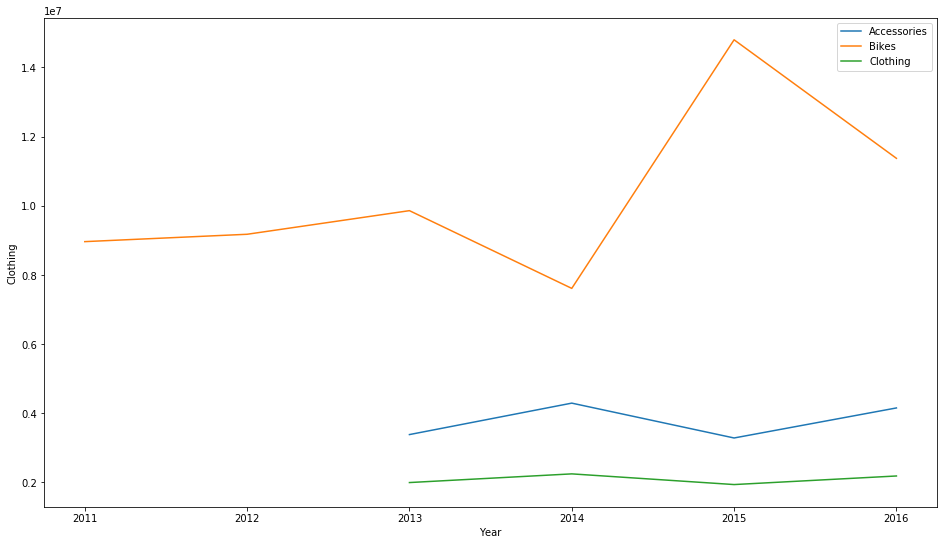

In [22]:
plt.figure(figsize=(16,9))
sns.lineplot(x=df5.Year,y=df5.Accessories, data=df5);
sns.lineplot(x=df5.Year,y=df5.Bikes, data=df5);
sns.lineplot(x=df5.Year,y=df5.Clothing, data=df5);

plt.legend(labels=['Accessories','Bikes', 'Clothing']);

Add another pivot chart, this time for the pivot table that shows Revenue by Age Group (the pivot table you created for question 5 in Lab 3A). Select a Pie chart to display the proportion of each Age Group (remember the chart styles) with data labels, formatted to two decimal points.

In [23]:
df6 = df3
df6

,Revenue
Age Group,
Adults (35-64),42584153.0
Seniors (64+),308042.0
Young Adults (25-34),30655614.0
Youth (<25),11721386.0


In [24]:
df6.reset_index(inplace=True)
df6

,Age Group,Revenue
0,Adults (35-64),42584153.0
1,Seniors (64+),308042.0
2,Young Adults (25-34),30655614.0
3,Youth (<25),11721386.0


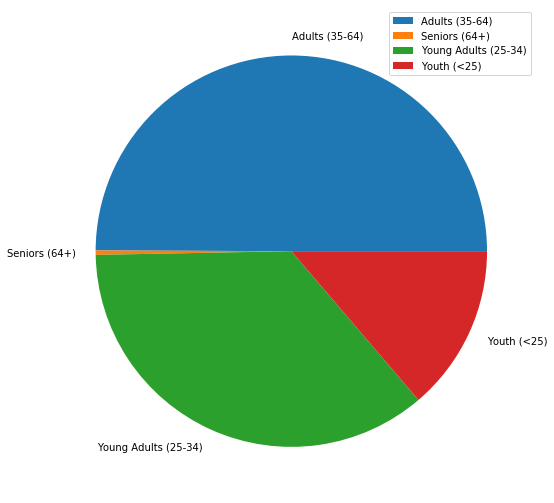

In [25]:
plt.figure(figsize=(16,9))
plt.pie(x=df6['Revenue'],labels=df6['Age Group'])
plt.legend()
plt.show()

Add another pivot chart, this time for the pivot table that shows Revenue by Frame size (the pivot table you created for question 4 in Lab 3A). Select a Bar chart to display the order of revenue by Frame size. Sort the Y axis to show the Frame size that has the highest revenue on the top.
Hint: Select the Categories in reverse order option in the Axis Options.

In [26]:
df7 = df2

In [27]:
df7

,Revenue
Frame Size,
38.0,7934102.0
40.0,1810719.0
42.0,8385348.0
44.0,6487682.0
46.0,7230025.0
48.0,8197548.0
50.0,1875166.0
52.0,5957787.0
54.0,1600407.0


In [28]:
df8 = df7['Revenue'].sort_values(ascending=False)
df8

Frame Size
42.0    8385348.0
48.0    8197548.0
38.0    7934102.0
46.0    7230025.0
44.0    6487682.0
52.0    5957787.0
62.0    4287129.0
56.0    3158805.0
58.0    3111467.0
50.0    1875166.0
40.0    1810719.0
60.0    1744136.0
54.0    1600407.0
Name: Revenue, dtype: float64

In [29]:
df8.to_frame()

,Revenue
Frame Size,
42.0,8385348.0
48.0,8197548.0
38.0,7934102.0
46.0,7230025.0
44.0,6487682.0
52.0,5957787.0
62.0,4287129.0
56.0,3158805.0
58.0,3111467.0


In [30]:
df9 = pd.DataFrame({'FrameSize':df8.index,'Revenue':df8.values})
df9

,FrameSize,Revenue
0,42.0,8385348.0
1,48.0,8197548.0
2,38.0,7934102.0
3,46.0,7230025.0
4,44.0,6487682.0
5,52.0,5957787.0
6,62.0,4287129.0
7,56.0,3158805.0
8,58.0,3111467.0
9,50.0,1875166.0


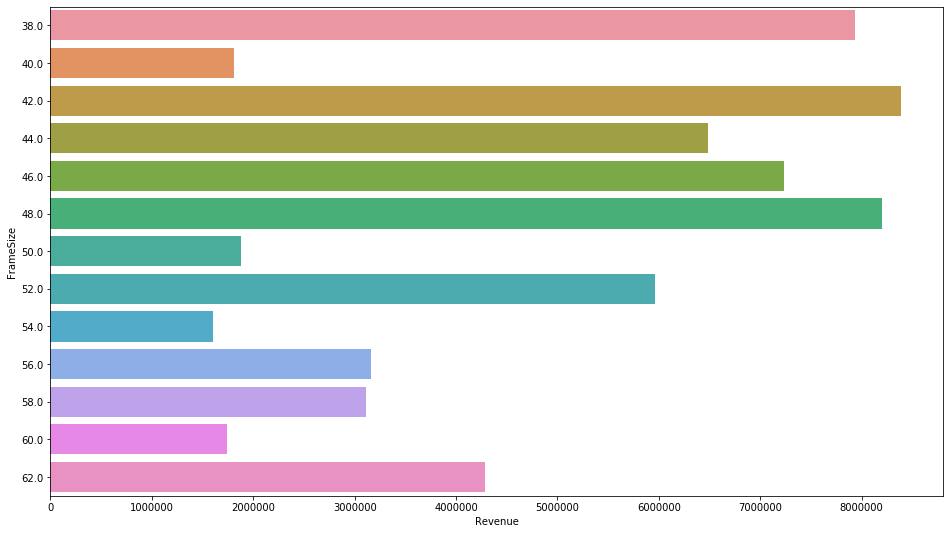

In [31]:
plt.figure(figsize=(16,9))
sns.barplot(x = df9.Revenue, y = df9.FrameSize, orient='h');